Import Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport

Import Dataset

In [2]:
pd.set_option('display.max_rows', None)
d1=pd.read_csv('diabetes-2.csv')
print(d1)
d1.info()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

Splitting the data set into the dependent and independent variable. The dependent variable in this context is the
prediction, which is either 0 or 1. Other columns represents the dependent variable.

In [3]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


The data set is then separated into different sets; the training set and the test set

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


We then call the decision tree classifier model from the sk learn library

In [6]:
DC=DecisionTreeClassifier()

DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [7]:
print(y_pred)

[0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0]


In [8]:
d2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d2.head()

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,1
726,0,0


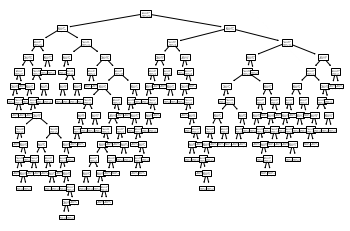

In [9]:
# We print out the decision tree. The solution generation are highlighted in the tree description.
tree.plot_tree(DC)
plt.savefig('DecisionTreeDiabetics.pdf')

In [10]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7077922077922078


In [11]:
cf=confusion_matrix(y_test,y_pred)

In [12]:
print(cf)

[[79 20]
 [25 30]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



DataBase Management

In [16]:
import sqlite3

conn=sqlite3.connect('c:test.db')

print("Opened database successfully")

#'c:test.db',/Users/regenesys/Recents/test23

Opened database successfully


In [17]:
conn.execute('''CREATE TABLE Student_Marks ( Roll_Number INT PRIMARY KEY NOT NULL, Name TEXT NOT NULL, Marks INT NOT NULL);''')

print("Table 1 created successfully")

conn.execute("create table Student_Info(Registration_no int primary key not null, Name text not null, Address text not null, Mobile int not null, Date_of _Birth date not null)")

print("Table 2 created successfully")

Table 1 created successfully
Table 2 created successfully


In [18]:
conn.execute("alter table Student_Info add Gender text not null")

In [19]:
conn.execute("drop table Student_Info")

In [20]:
conn.execute("INSERT INTO Student_Marks (Roll_Number,Name,Marks)VALUES (1, 'John',80 )");

In [21]:
conn.execute("INSERT INTO Student_Marks (Roll_Number,Name,Marks)VALUES (2,'Mark',60)");

conn.execute("INSERT INTO Student_Marks (Roll_Number,Name,Marks)VALUES (3,'Linda',82)");

conn.execute("INSERT INTO Student_Marks (Roll_Number,Name,Marks)VALUES (4,'Robyn',91)");

In [22]:
CURSOR=conn.execute("SELECT Roll_Number,Name,Marks FROM Student_Marks")

for row in CURSOR:

 print("Roll_Number=", row[0])

 print("NAME=", row[1])

 print("Marks=",row[2])

Roll_Number= 1
NAME= John
Marks= 80
Roll_Number= 2
NAME= Mark
Marks= 60
Roll_Number= 3
NAME= Linda
Marks= 82
Roll_Number= 4
NAME= Robyn
Marks= 91


In [23]:
cursor = conn.cursor()


cursor.execute("SELECT * FROM Student_Marks")

print("fetchall:")

result = cursor.fetchall()

for r in result:

 print(r)

fetchall:
(1, 'John', 80)
(2, 'Mark', 60)
(3, 'Linda', 82)
(4, 'Robyn', 91)


In [24]:
cursor.execute("update Student_Marks set Name='SAM' where Roll_Number=2")


cursor = conn.cursor()

cursor.execute("SELECT * FROM Student_Marks")

print("fetchall:")

result = cursor.fetchall()

for r in result:

 print(r)

fetchall:
(1, 'John', 80)
(2, 'SAM', 60)
(3, 'Linda', 82)
(4, 'Robyn', 91)


In [25]:
cursor.execute("delete from Student_Marks where Roll_Number=2")


cursor.execute("SELECT * FROM Student_Marks")

print("fetchall:")

result = cursor.fetchall()

for r in result:

 print(r)

fetchall:
(1, 'John', 80)
(3, 'Linda', 82)
(4, 'Robyn', 91)
